In [21]:
# Katarzyna Stojek

# python 3.11.2
# numpy 1.24.2
# scipy 1.10.1
# matplotlib 3.7.1

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

Wstęp:

Celem zadania było pogłębienie wiedzy dotyczącej różnych rodzajów filtrów oraz ich wykorzystania. W szczególności wykorzystanie w ćwiczeniu filtrów FIR oraz IIR, które wykorzystane zostaną do analizy sygnałów sztucznych oraz próbki sygnału EKG.

In [22]:
# def funkcji pochodzi z archiwalnej dokumentacji biblioteki scipy
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

SNR sygnał oryginalny:  0.6463817447657241
SNR sygnał przefiltrowany:  0.8484455139478005


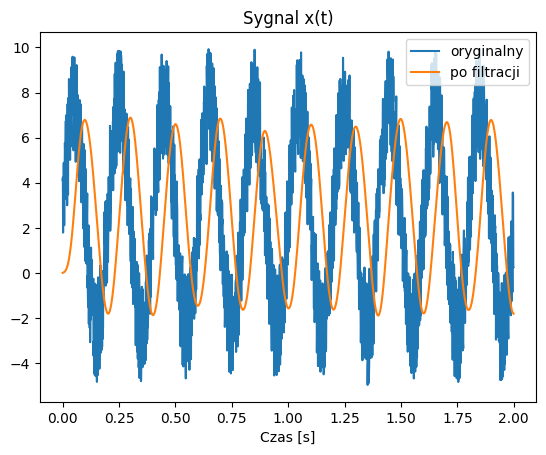

In [23]:
# Generowanie zaszumionego sygnału
N=2000
A=5
f=5 # częstotliwość sinusa = 5 Hz
fs=1000
dt=1/fs #okres próbkowania
t_szum=np.arange(N)/fs #wektor chwil próbkowania
x_szum=A*np.sin(2*np.pi*f*t_szum) + A*np.random.random(N) #zaszumiony sygnał

stnr = signaltonoise(x_szum)
print("SNR sygnał oryginalny: ",stnr)

# Filtr FIR dolnoprzepustowy 5.1Hz
dp = sig.firwin(100, 5.1, fs=fs)
filtr_fir_dp = sig.lfilter(dp, 1, x_szum)
stnr = signaltonoise(filtr_fir_dp)
print("SNR sygnał przefiltrowany: ",stnr)

plt.plot(t_szum,x_szum,label='oryginalny')
plt.plot(t_szum,filtr_fir_dp,label='po filtracji')
plt.title("Sygnal x(t)")
plt.xlabel("Czas [s]")
plt.legend(loc='upper right')

SNR sygnał oryginalny:  0.6444947453072369

SNR sygnał przefiltrowany:  0.8428126666259674

Signal to Noise Ratio potwierdza niejako, że z sygnału usunięto część szumu. Nie udało sie natomiast dokonać idealnej firtracji w której otrzymalibyśmy nie zaburzony w żaden sposób sygnał. Widoczne są swłaszcza wahania w wartości amplitudy sygnału oraz spodziewane dla filtra FIR przesunięcie sygnału wynikowego w fazie.

Text(0.5, 1.0, 'Wynik filtracji FIR dolnoprzepustowy')

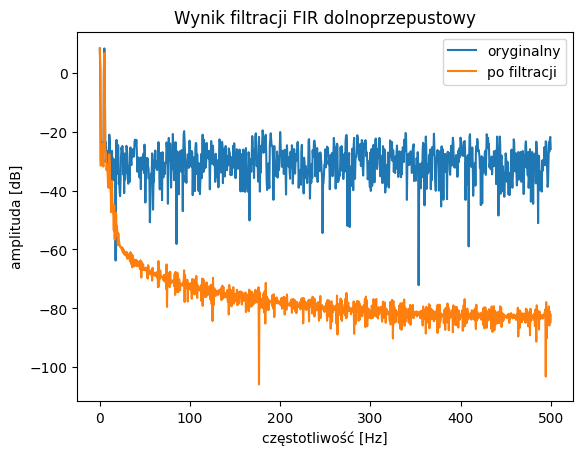

In [24]:
widmo_szum = 20 * np.log10(np.abs(np.fft.rfft(x_szum * np.hamming(N))) / 1024)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(filtr_fir_dp * np.hamming(N))) / 1024)
f = np.fft.rfftfreq(N, 1 / fs)

plt.plot(f, widmo_szum, label='oryginalny')
plt.plot(f, widmo_przefiltrowany, label='po filtracji')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda [dB]')
plt.legend(loc='upper right')
plt.title('Wynik filtracji FIR dolnoprzepustowy')

Na spektrogramie widoczne jest zmniejszenie amplitud dla szumu, bez znacznej zmiany wartości wyników obserwowanych dla niskich częstotliwości. Zatem wynik, którego spodziewamy się wykorzystując filtr dolnoprzepustowy.

SNR sygnał przefiltrowany:  -0.00784385486456068


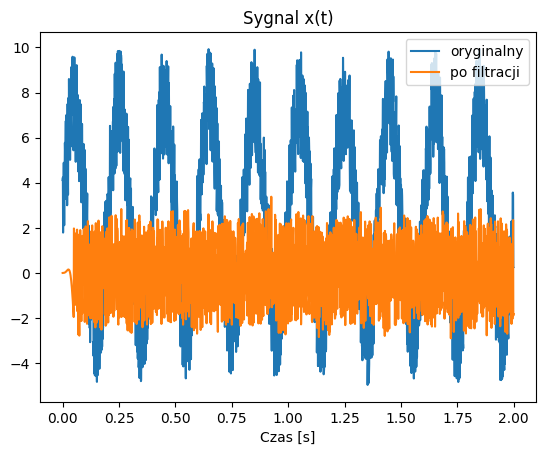

In [25]:
# Filtr FIR górnoprzepustowy 20Hz
gp = sig.firwin(101, 20, pass_zero=False, fs=fs)
filtr_fir_gp = sig.lfilter(gp, 1, x_szum)

stnr = signaltonoise(filtr_fir_gp)
print("SNR sygnał przefiltrowany: ",stnr)
#wynik nie jest zaskoczeniem - odfiltrowano sygnał, zostawiono szum

plt.plot(t_szum,x_szum,label='oryginalny')
plt.plot(t_szum,filtr_fir_gp,label='po filtracji')
plt.title("Sygnal x(t)")
plt.xlabel("Czas [s]")
plt.legend(loc='upper right')

Z pomocą filtra dolnoprzepustowego udało się odfiltrować pierwotny sygnał pozostawiając głównie szum o większej częstotliwości. Interesującym może być, że konieczne było w tym celu wykorzystanie filtra górnoprzepustowego o progu znacząco wyższym niż częstotliwość generowanego przez nas pierwotnie sygnału sinus, aby sinusoidalność sygnału przestała być widoczna.

Text(0.5, 1.0, 'Wynik filtracji FIR górnoprzepustowy')

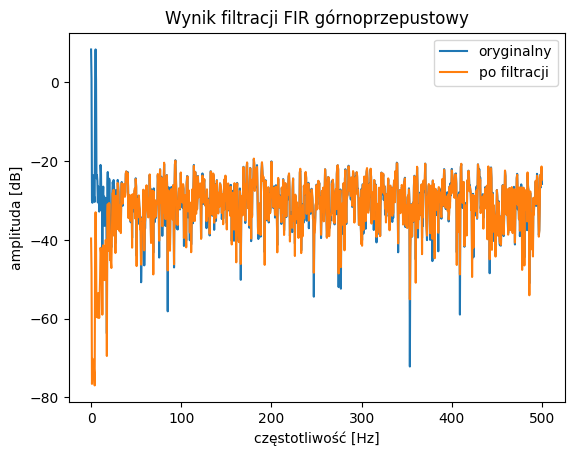

In [26]:
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(filtr_fir_gp * np.hamming(N))) / 1024)
f = np.fft.rfftfreq(N, 1 / fs)

plt.plot(f, widmo_szum, label='oryginalny')
plt.plot(f, widmo_przefiltrowany, label='po filtracji')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda [dB]')
plt.legend(loc='upper right')
plt.title('Wynik filtracji FIR górnoprzepustowy')

#skutecznie odfiltrowano sinus i pozostawiono szum, widoczne odfiltrowanie niższych częstotliwości

SNR sygnał przefiltrowany:  0.8388855163981497


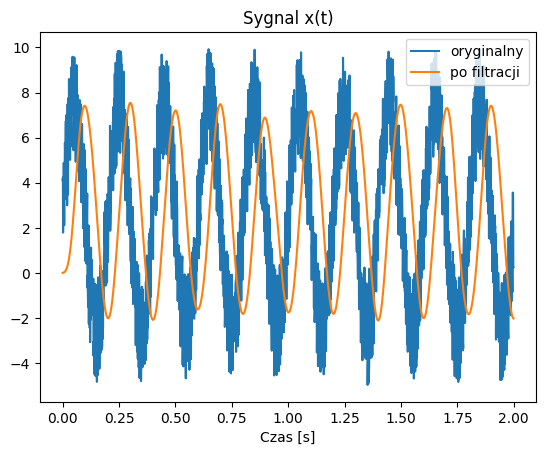

In [27]:
pp = sig.firwin(100, (2, 5), pass_zero=False, fs=fs)

filtr_fir_pp = sig.lfilter(pp, 1, x_szum)
stnr = signaltonoise(filtr_fir_pp) # niejako połączenie funkcjonalności filtra dolno- i górnoprzepustowego.
print("SNR sygnał przefiltrowany: ",stnr) # większe niż dla sygnału przed filtracją - dobrze

plt.plot(t_szum,x_szum,label='oryginalny')
plt.plot(t_szum,filtr_fir_pp,label='po filtracji')
plt.title("Sygnal x(t)")
plt.xlabel("Czas [s]")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Wynik filtracji FIR pasmowoprzepustowy')

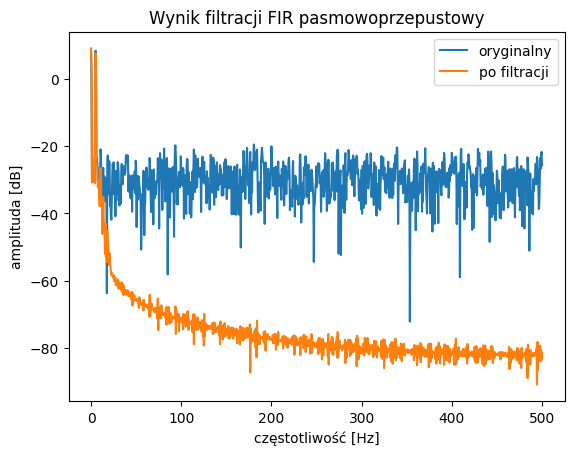

In [28]:
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(filtr_fir_pp * np.hamming(N))) / 1024)
f = np.fft.rfftfreq(N, 1 / fs)

plt.plot(f, widmo_szum, label='oryginalny')
plt.plot(f, widmo_przefiltrowany, label='po filtracji')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda [dB]')
plt.legend(loc='upper right')
plt.title('Wynik filtracji FIR pasmowoprzepustowy')

In [29]:
# Filtry IIR

SNR sygnał przefiltrowany:  0.9877304840693127


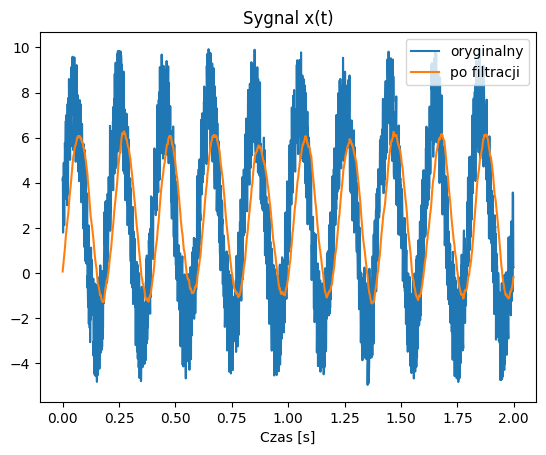

In [30]:
# Filtr IIR - dolnoprzepustowy
dp_b, dp_a = sig.iirfilter(1, 5 / (fs / 2), btype='lowpass')
filtr_iir_dp = sig.lfilter(dp_b, dp_a, x_szum)
stnr = signaltonoise(filtr_iir_dp)
print("SNR sygnał przefiltrowany: ",stnr) #dużo wyższy wynik, niż dla odpowiadającego filtra FIR, mimo to w sygnale bardziej widoczne różnice
# między kształtem przefiltrowanego sygnału a spodziewaną sinusoidą

plt.plot(t_szum,x_szum,label='oryginalny')
plt.plot(t_szum,filtr_iir_dp,label='po filtracji')
plt.title("Sygnal x(t)")
plt.xlabel("Czas [s]")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Wynik filtracji IIR dolnoprzepustowy')

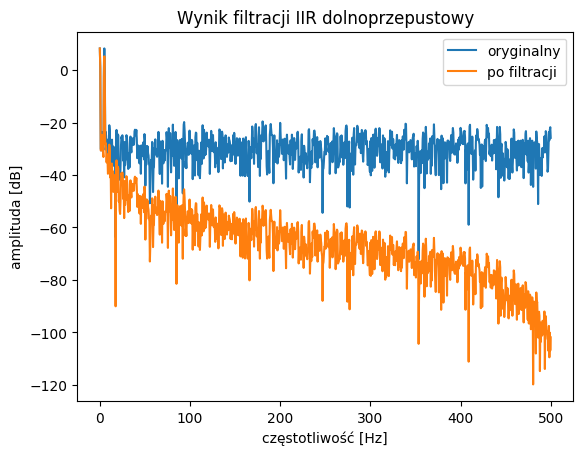

In [31]:
widmo_szum = 20 * np.log10(np.abs(np.fft.rfft(x_szum * np.hamming(N))) / 1024)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(filtr_iir_dp * np.hamming(N))) / 1024)
f = np.fft.rfftfreq(N, 1 / fs)

plt.plot(f, widmo_szum, label='oryginalny')
plt.plot(f, widmo_przefiltrowany, label='po filtracji')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda [dB]')
plt.legend(loc='upper right')
plt.title('Wynik filtracji IIR dolnoprzepustowy')

SNR sygnał przefiltrowany:  0.0005870203141581981


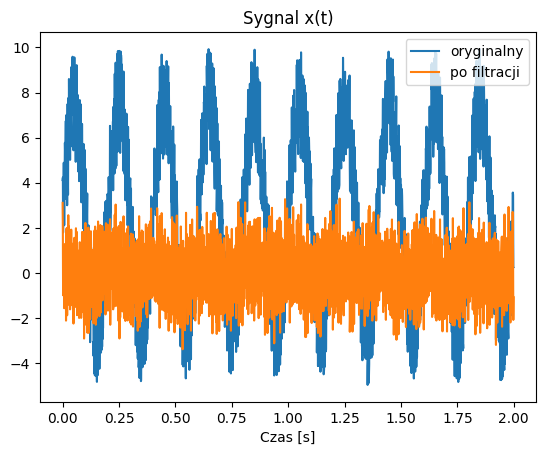

In [32]:
# Filtr IIR - górnoprzepustowy
gp_b, gp_a = sig.iirfilter(1, 100 / (fs / 2), btype='highpass')
filtr_iir_gp = sig.lfilter(gp_b, gp_a, x_szum)

stnr = signaltonoise(filtr_iir_gp)
print("SNR sygnał przefiltrowany: ",stnr) # wynik porównywalny do odpowiadającego dla filtra FIR

plt.plot(t_szum,x_szum,label='oryginalny')
plt.plot(t_szum,filtr_iir_gp,label='po filtracji')
plt.title("Sygnal x(t)")
plt.xlabel("Czas [s]")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Wynik filtracji IIR górnoprzepustowy')

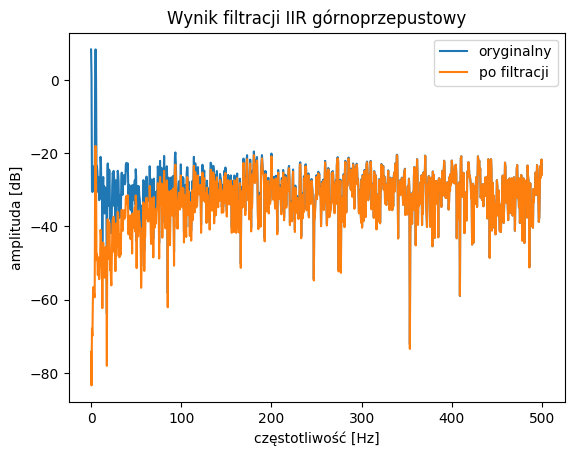

In [33]:
widmo_szum = 20 * np.log10(np.abs(np.fft.rfft(x_szum * np.hamming(N))) / 1024)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(filtr_iir_gp * np.hamming(N))) / 1024)
f = np.fft.rfftfreq(N, 1 / fs)

#Widma
plt.plot(f, widmo_szum, label='oryginalny')
plt.plot(f, widmo_przefiltrowany, label='po filtracji')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda [dB]')
plt.legend(loc='upper right')
plt.title('Wynik filtracji IIR górnoprzepustowy')

SNR sygnał przefiltrowany:  -0.013835007351456725


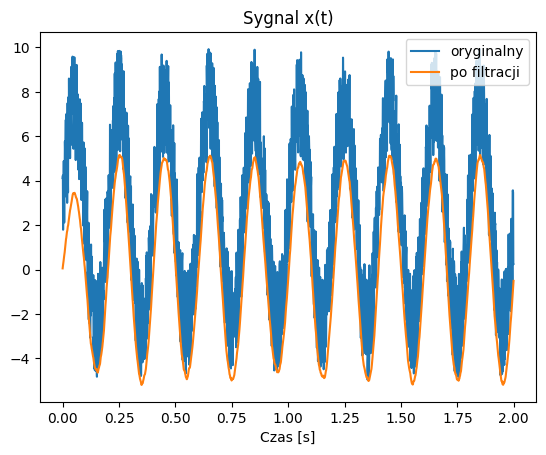

In [34]:
# Filtr IIR - pasmowoprzepustowy
pp_b, pp_a = sig.iirfilter(1, (4 / (fs / 2), 6 / (fs / 2)), rp=1, rs=60, ftype='ellip', btype='bandpass')
filtr_iir_pp = sig.lfilter(pp_b, pp_a, x_szum)
stnr = signaltonoise(filtr_iir_pp)
print("SNR sygnał przefiltrowany: ",stnr) # przefiltrowany sygnał wygląda dobrze, mimo to wartość SNR jest bardzo niska

plt.plot(t_szum,x_szum,label='oryginalny')
plt.plot(t_szum,filtr_iir_pp,label='po filtracji')
plt.title("Sygnal x(t)")
plt.xlabel("Czas [s]")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Wynik filtracji IIR pasmowoprzepustowy')

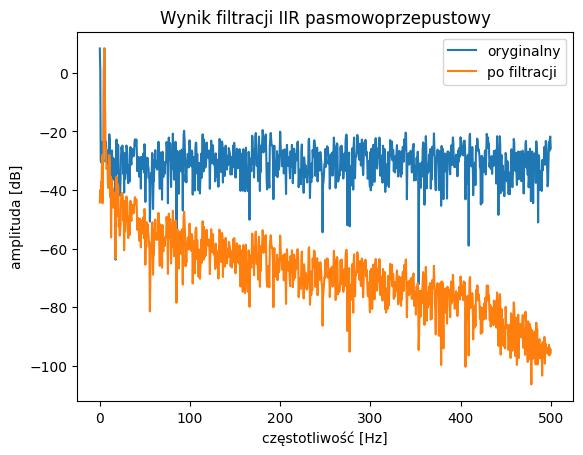

In [35]:
widmo_szum = 20 * np.log10(np.abs(np.fft.rfft(x_szum * np.hamming(N))) / 1024)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(filtr_iir_pp * np.hamming(N))) / 1024)
f = np.fft.rfftfreq(N, 1 / fs)

#Widma
plt.plot(f, widmo_szum, label='oryginalny')
plt.plot(f, widmo_przefiltrowany, label='po filtracji')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda [dB]')
plt.legend(loc='upper right')
plt.title('Wynik filtracji IIR pasmowoprzepustowy')

Zauważalną zaletą filtrów IIR w porównaniu z FIR jest to że faza sygnału nie zmienia się w trakcie filtracji, zatem jeżeli istotne jest dla nas zachowanie tej właściwości sygnału, będą to filtry preferowane. 

Wybrana definicja SNR wydaje się natomiast sprawdzać lepiej dla filtrów FIR, zatem prawdopodomnie należałoby zmodyfikować ją dla IIR, gdybyśmy chcieli wykorzystywać wartość SNR np. do automatycznego dostosowywania parametrów.

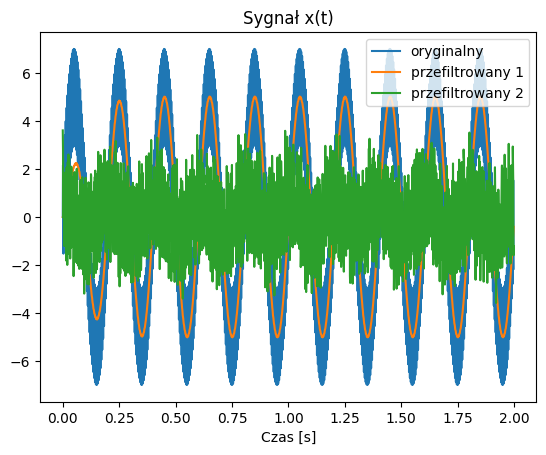

In [36]:
#Wygenerowanie złożenia dwóch sinusów
N=2000
A=5
f1=5
f2=50
fs=1000
dt=1/fs; # okres próbkowania
t_sin=np.arange(N)/fs # wektor chwil próbkowania
x_sin=A*np.sin(2*np.pi*f1*t_sin) + 2*np.sin(10*np.pi*f2*t_sin) # sygnał

# filtracja, aby został tylko sygnał f1=5
# Filtr IIR - pasmowoprzepustowy
pp_b, pp_a = sig.iirfilter(1, (4 / (fs / 2), 6 / (fs / 2)), rp=1, rs=60, ftype='ellip', btype='bandpass')
filtr_iir_pp_f1 = sig.lfilter(pp_b, pp_a, x_sin)
# filtracja, aby został tylko sygnał f2=50
# Filtr IIR - górnoprzepustowy
gp_b, gp_a = sig.iirfilter(1, 45 / (fs / 2), btype='highpass')
filtr_iir_gp_f2 = sig.lfilter(gp_b, gp_a, x_szum)

plt.plot(t_sin,x_sin,label='oryginalny')
plt.plot(t_sin,filtr_iir_pp_f1,label='przefiltrowany 1')
plt.plot(t_sin,filtr_iir_gp_f2,label='przefiltrowany 2')

plt.title("Sygnał x(t)")
plt.xlabel("Czas [s]")
plt.legend(loc = 'upper right')

Text(0.5, 1.0, 'Widma sygnału przed i po filtracji')

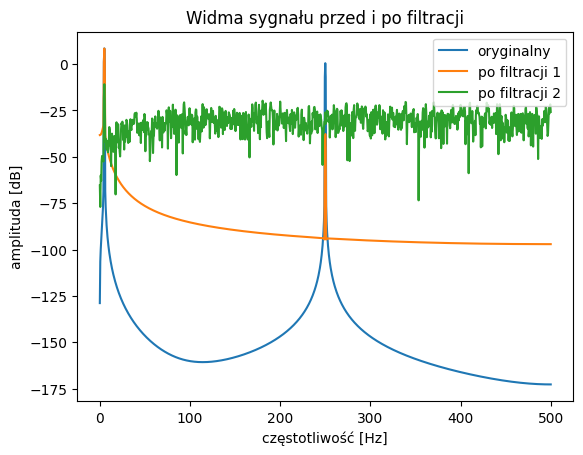

In [37]:
widmo_sin = 20 * np.log10(np.abs(np.fft.rfft(x_sin * np.hamming(N))) / 1024)
widmo_przefiltrowany1 = 20 * np.log10(np.abs(np.fft.rfft(filtr_iir_pp_f1 * np.hamming(N))) / 1024)
widmo_przefiltrowany2 = 20 * np.log10(np.abs(np.fft.rfft(filtr_iir_gp_f2 * np.hamming(N))) / 1024)
f = np.fft.rfftfreq(N, 1 / fs)

#Widma
plt.plot(f, widmo_sin, label='oryginalny')
plt.plot(f, widmo_przefiltrowany1, label='po filtracji 1')
plt.plot(f, widmo_przefiltrowany2, label='po filtracji 2')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda [dB]')
plt.legend(loc='upper right')
plt.title('Widma sygnału przed i po filtracji')

Udało się wyodrębnić sygnał sinusa o mniejszej częstotliwośći natomiast sinus o większej przypomina po filtracji raczej szum.

In [38]:
# EKG 
import mat4py as m4p

ekg = m4p.loadmat("ecg.mat")
ecg = ekg['ecg']

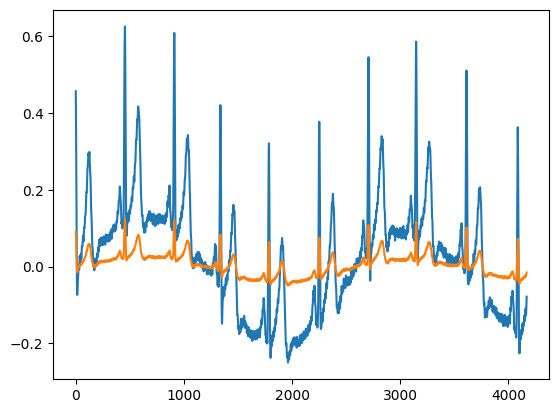

In [39]:
plt.plot(ecg)
fs = 500

# Filtr IIR - pasmowoprzepustowy
pp_b, pp_a = sig.iirfilter(1, (80 / (fs / 2), 100/ (fs / 2)), rp=1, rs=60, ftype='ellip', btype='bandpass')
filtr_iir_pp_3 = sig.lfilter(pp_b, pp_a, ecg)

plt.plot(filtr_iir_pp_3)

Udało się ograniczyć wpływ falowania linii bazowej, mimo to jest ono nadal widoczne postarano się także o wyeliminowanie zakłuceń z sieci elektrycznej. Wybrano w tym celu filtr pasmowoprzepustowy ponieważ falowanie linii bazowej miało małą częstotliwość - do odfiltrowania wyłącznie jego wykorzystano by zatem filtr górnoprzepustowy. Zakłucenia sieci elektrycznej są natomiast stosunkowo wysokiej częstotliwości (50/60Hz w zależności od standardu w danym kraju / lokalizacji) zatem gdyby chciano odfiltrować jedynie je wykorzystano by filtr dolnoprzepustowy. Tym samym aby dokonać obu rzeczy jednocześnie konieczne było wykorzystanie filtra pasmowo przepustowego.

Wnioski

Udało się osiągnąć cel jakim było pogłębienie wiedzy dotyczącej różnych rodzajów filtrów oraz ich wykorzystania, a w szczególności wykorzystanie w ćwiczeniu filtrów FIR oraz IIR, które wykorzystane zostaną do analizy sygnałów sztucznych oraz próbki sygnału EKG.

Wykonano wszystkie polecone zadania.